In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('purchase_data.csv')
df.head()

,Customer ID,Product ID,Product Category,Purchase Amount,Purchase Date
0,C055,P005,Books,40.32,2024-10-25
1,C241,P015,Grocery,26.46,2024-11-23
2,C105,P029,Electronics,274.93,2025-01-22
3,C136,P004,Home & Kitchen,92.17,2025-01-31
4,C346,P008,Health & Beauty,151.86,2025-02-15


In [3]:
analysis = {}

Analysis of the Products

In [9]:
product_sales = df.groupby('Product ID')['Purchase Amount'].agg(['sum', 'count'])
product_sales.columns = ['Total_Sales', 'Units_Sold']
analysis['top_products_by_sales'] = product_sales.sort_values('Total_Sales', ascending=False).head(10)
analysis['top_products_by_units'] = product_sales.sort_values('Units_Sold', ascending=False).head(10)

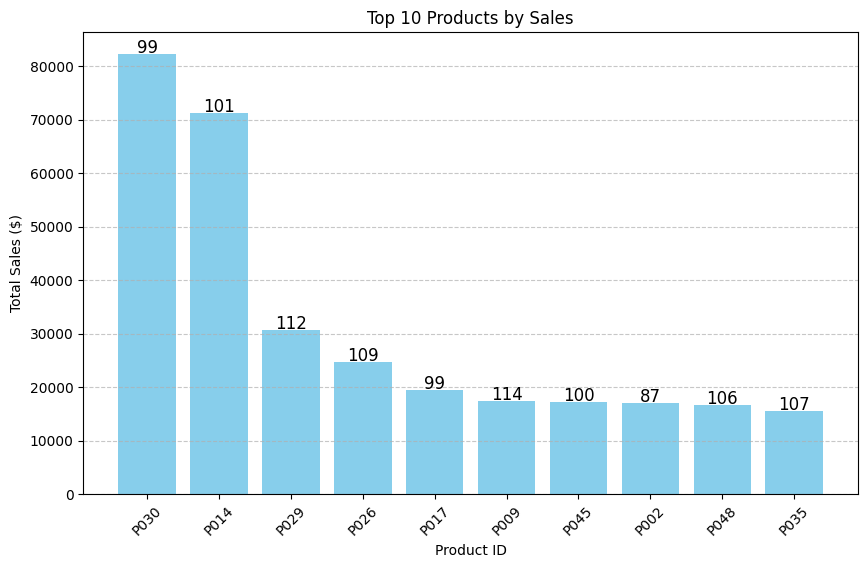

In [15]:
top_products = analysis['top_products_by_sales']
product_ids = top_products.index.astype(str)
total_sales = top_products['Total_Sales']
units_sold = top_products['Units_Sold']

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(product_ids, total_sales, color='skyblue')

# Add unit sold as text labels above bars
for bar, units in zip(bars, units_sold):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200, f"{units}",
            ha='center', fontsize=12, color='black')

# Labels and title
ax.set_xlabel("Product ID")
ax.set_ylabel("Total Sales ($)")
ax.set_title("Top 10 Products by Sales")
ax.set_xticks(np.arange(len(product_ids)))
ax.set_xticklabels(product_ids, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


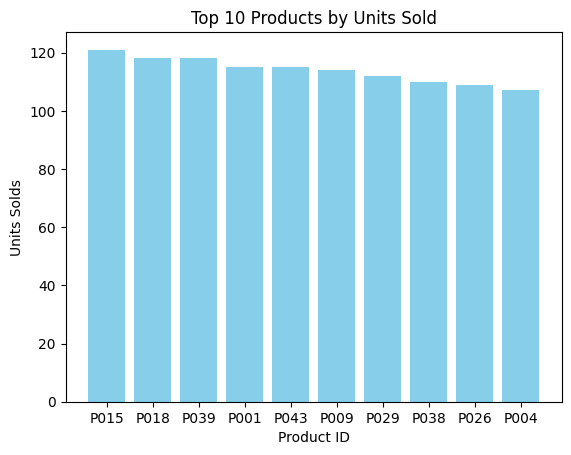

In [16]:
plt.bar(analysis['top_products_by_units'].index, analysis['top_products_by_units']['Units_Sold'], color="skyblue")
plt.xlabel('Product ID')
plt.ylabel('Units Solds')
plt.title('Top 10 Products by Units Sold')
plt.show()

Analysis of the Categories

In [6]:
category_sales = df.groupby('Product Category')['Purchase Amount'].agg(['sum', 'count'])
category_sales.columns = ['Total_Sales', 'Units_Sold']
analysis['category_performance'] = category_sales.sort_values('Total_Sales', ascending=False)

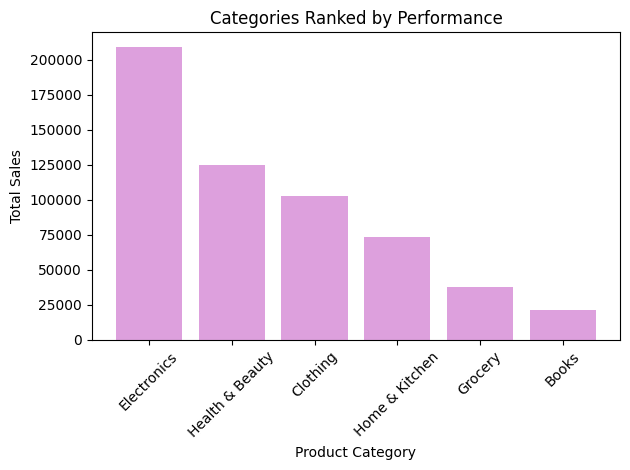

In [31]:
plt.bar(analysis['category_performance'].index, analysis['category_performance']['Total_Sales'], color="plum")
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Categories Ranked by Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

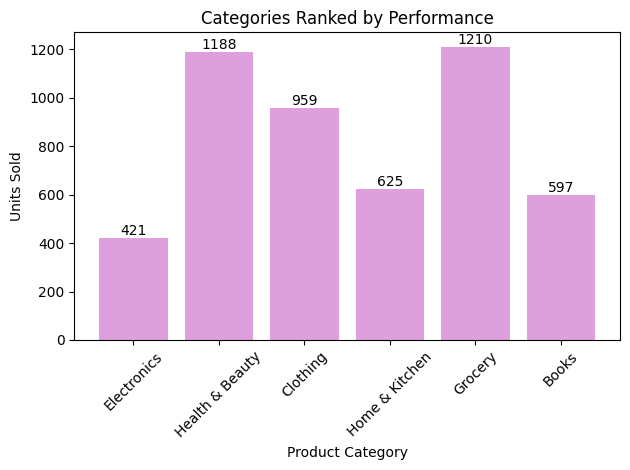

In [32]:
bars = plt.bar(analysis['category_performance'].index, analysis['category_performance']['Units_Sold'], color="plum")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')
plt.title('Categories Ranked by Performance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of the Customers

In [33]:
customer_spending = df.groupby('Customer ID')['Purchase Amount'].agg(['sum', 'mean', 'count'])
customer_spending.columns = ['Total_Spent', 'Average_Purchase', 'Purchase_Count']
analysis['customer_spending'] = customer_spending
analysis['avg_customer_spend'] = customer_spending['Total_Spent'].mean()
analysis['avg_purchase_value'] = df['Purchase Amount'].mean()

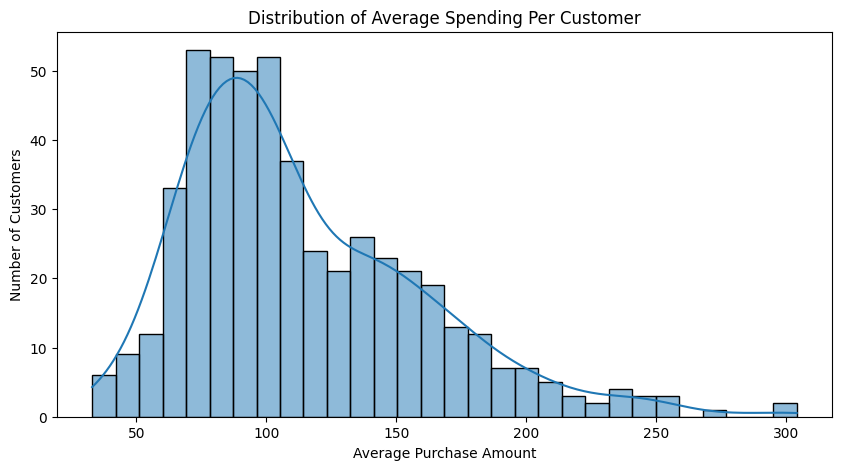

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(customer_spending['Average_Purchase'], bins=30, kde=True)
plt.xlabel('Average Purchase Amount')
plt.ylabel('Number of Customers')
plt.title('Distribution of Average Spending Per Customer')
plt.show()


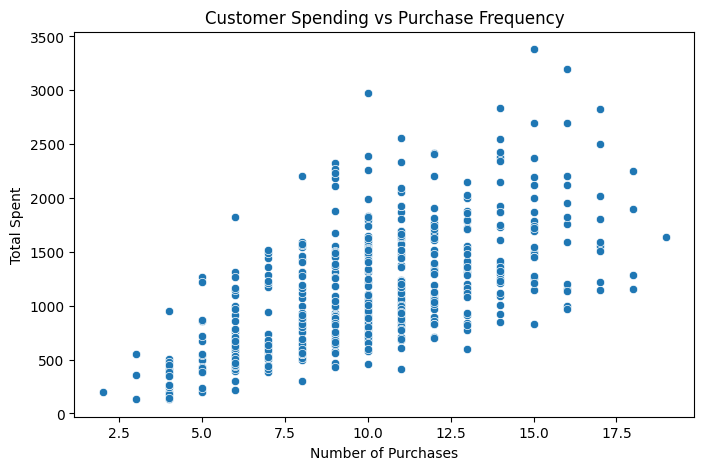

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_spending['Purchase_Count'], y=customer_spending['Total_Spent'])
plt.xlabel('Number of Purchases')
plt.ylabel('Total Spent')
plt.title('Customer Spending vs Purchase Frequency')
plt.show()

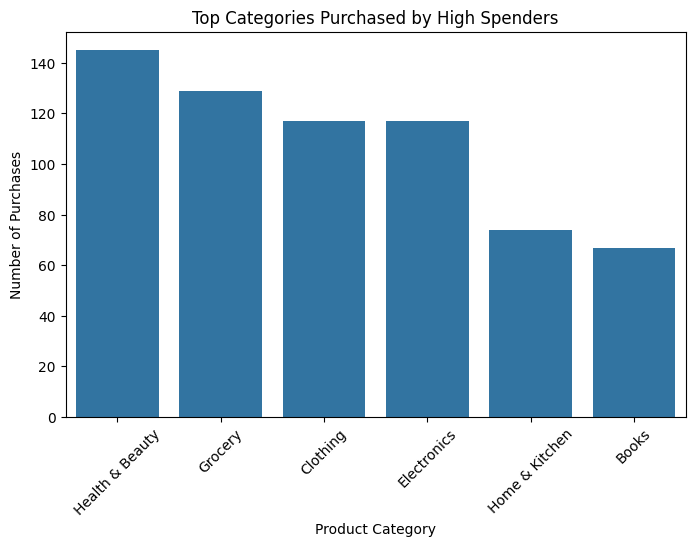

In [40]:
high_spenders = customer_spending[customer_spending['Total_Spent'] > customer_spending['Total_Spent'].quantile(0.9)]
category_counts = df[df['Customer ID'].isin(high_spenders.index)]['Product Category'].value_counts()

plt.figure(figsize=(8,5), color="")
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.title('Top Categories Purchased by High Spenders')
plt.show()